## Importing the Python Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Load the Dataset

In [32]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [33]:
data.describe()

,Longitude,Latitude,Speed,Distance,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,...,Gyro_Change,Net_Displacement,Speed_Change,Heading_Change,Rolling_Acc_Mean,Rolling_Acc_STD,acc_mean,acc_std,gyro_mean,gyro_std
count,14246.000000,14246.000000,14246.000000,1.424600e+04,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,...,14246.000000,14246.000000,1.424600e+04,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000,14246.000000
mean,73.826564,18.508567,0.771898,2.795223e+03,-0.001137,0.180237,-0.023576,171.269128,-0.001319,-0.006521,...,-0.000001,0.000004,-9.351872e-20,-0.023937,1.608040,0.742972,0.051841,0.926517,-0.003680,0.077019
std,0.003661,0.005242,0.705439,1.205988e+05,1.030982,0.837260,1.768811,105.496919,0.141039,0.087850,...,0.104109,0.000016,3.588373e-02,17.575867,1.227237,0.700332,0.691140,0.940104,0.051239,0.079085
min,73.821195,18.501504,0.000000,0.000000e+00,-8.805807,-8.476646,-17.320633,0.000000,-2.062668,-0.571912,...,-1.387471,0.000000,-7.600000e-01,-359.000000,0.144979,0.015304,-9.247761,0.007141,-0.780774,0.000224
25%,73.822785,18.504085,0.000000,4.480815e+02,-0.378820,-0.126690,-0.701545,77.000000,-0.046690,-0.033272,...,-0.031879,0.000000,0.000000e+00,0.000000,0.667844,0.269350,-0.226714,0.324081,-0.020247,0.023565
50%,73.828663,18.507860,0.760000,1.007369e+03,-0.013089,0.167227,-0.025761,150.000000,-0.002219,-0.005783,...,-0.000116,0.000000,0.000000e+00,0.000000,1.284077,0.527778,0.049606,0.622861,-0.003754,0.049857
75%,73.829445,18.513463,1.220000,1.645653e+03,0.362683,0.478868,0.674922,249.000000,0.044939,0.021706,...,0.030804,0.000000,0.000000e+00,0.000000,2.093364,0.951488,0.320148,1.195859,0.014410,0.104188
max,73.831393,18.518714,2.712000,8.312031e+06,10.488632,11.013258,19.725800,359.000000,1.611687,0.599585,...,1.626290,0.000231,9.280000e-01,359.000000,12.513593,7.277411,9.133835,13.711424,0.492676,1.110263


## Using Isolation Forest for outliers detection 

Accuracy: 0.4931
Precision: 0.9284
Recall: 0.1567
F1 Score: 0.2682


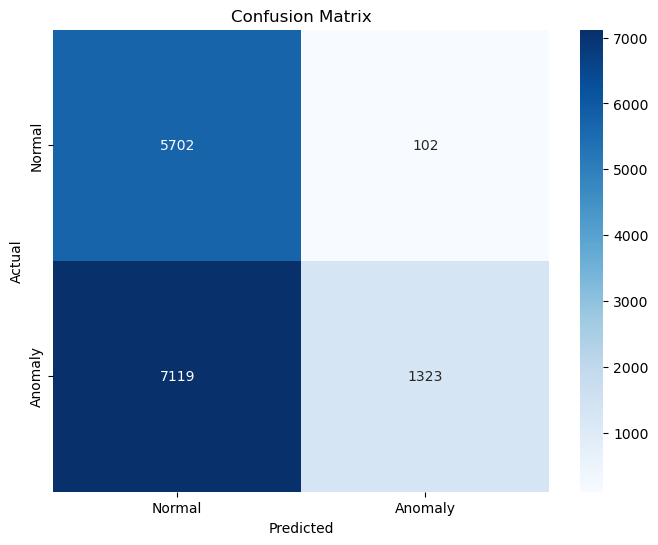

              precision    recall  f1-score   support

      Normal       0.44      0.98      0.61      5804
     Anomaly       0.93      0.16      0.27      8442

    accuracy                           0.49     14246
   macro avg       0.69      0.57      0.44     14246
weighted avg       0.73      0.49      0.41     14246



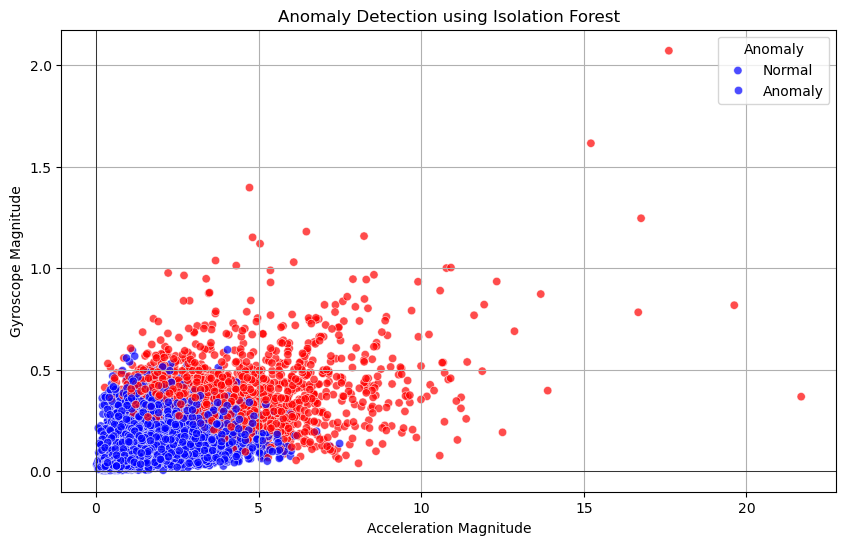

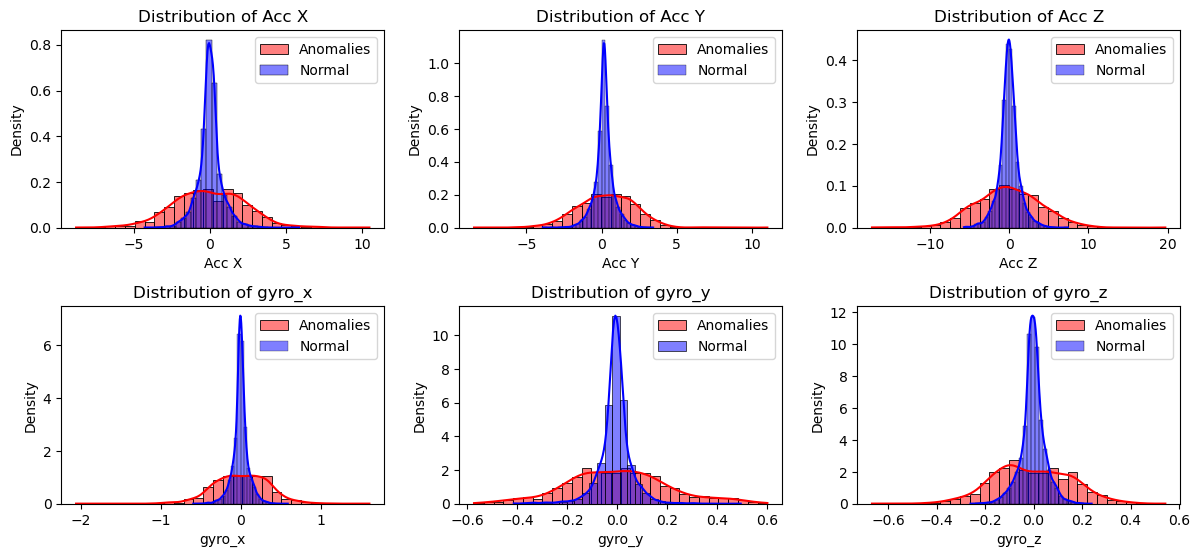

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']  # Modify as needed
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies
data['anomaly'] = iso_forest.predict(X_scaled)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation

 # Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(data['label'], data['anomaly'])
precision = precision_score(data['label'], data['anomaly'])
recall = recall_score(data['label'], data['anomaly'])
f1 = f1_score(data['label'], data['anomaly'])
        
# Print and store the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(data['label'], data['anomaly'])  # Replace 'label' with your actual label column name

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(data['label'], data['anomaly'], target_names=['Normal', 'Anomaly']))

# Visualizing anomalies on feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Acc_Magnitude', y='Gyro_Magnitude', hue='anomaly', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Acceleration Magnitude')
plt.ylabel('Gyroscope Magnitude')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

# Visualize the distribution of anomalies
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)  # Adjust the layout as needed
    sns.histplot(data[data['anomaly'] == 1][feature], color='red', bins=30, kde=True, label='Anomalies', stat='density', alpha=0.5)
    sns.histplot(data[data['anomaly'] == 0][feature], color='blue', bins=30, kde=True, label='Normal', stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()


## Accuracy at different value of Contamination


Evaluating for contamination = 0.05
Accuracy: 0.4517
Precision: 0.9425
Recall: 0.0796
F1 Score: 0.1468

Evaluating for contamination = 0.1
Accuracy: 0.4931
Precision: 0.9284
Recall: 0.1567
F1 Score: 0.2682

Evaluating for contamination = 0.2
Accuracy: 0.5691
Precision: 0.9042
Recall: 0.3051
F1 Score: 0.4563

Evaluating for contamination = 0.3
Accuracy: 0.6438
Precision: 0.8940
Recall: 0.4526
F1 Score: 0.6010

Evaluating for contamination = 0.4
Accuracy: 0.7137
Precision: 0.8829
Recall: 0.5959
F1 Score: 0.7116

Evaluating for contamination = 0.5
Accuracy: 0.7731
Precision: 0.8656
Recall: 0.7304
F1 Score: 0.7923

Best contamination: 0.5 with Accuracy: 0.7731
Precision: 0.8656, Recall: 0.7304, F1 Score: 0.7923


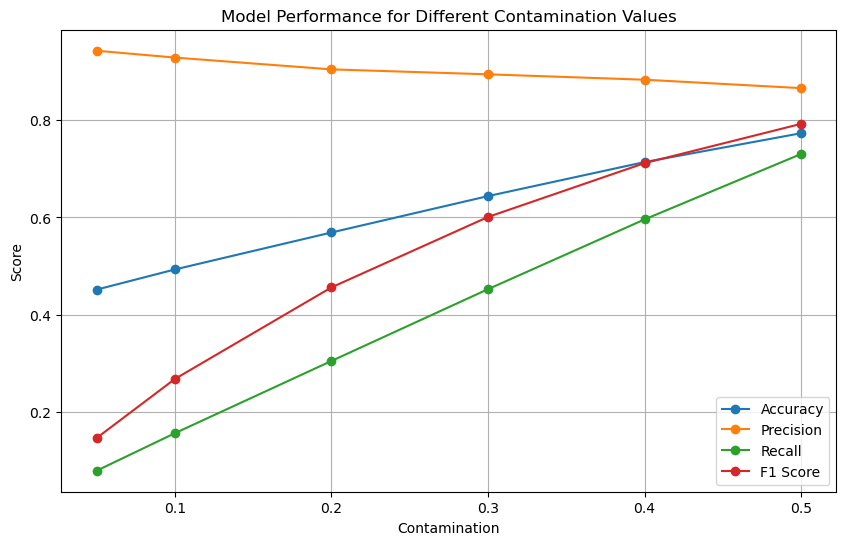

In [16]:
# Function to evaluate model performance for different contamination values
def evaluate_model_for_contamination(data, X_scaled, contamination_values):
    results = []
    
    for contamination in contamination_values:
        print(f"\nEvaluating for contamination = {contamination}")
        
        # Create the Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        
        # Fit the model
        iso_forest.fit(X_scaled)
        
        # Predict anomalies
        data['anomaly'] = iso_forest.predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'contamination': contamination,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of contamination values to try
contamination_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Call the function to evaluate the model for different contamination values
results = evaluate_model_for_contamination(data, X_scaled, contamination_values)

# Print the best contamination and its corresponding accuracy
best_contamination = max(results, key=lambda x: x['accuracy'])
print(f"\nBest contamination: {best_contamination['contamination']} with Accuracy: {best_contamination['accuracy']:.4f}")
print(f"Precision: {best_contamination['precision']:.4f}, Recall: {best_contamination['recall']:.4f}, F1 Score: {best_contamination['f1_score']:.4f}")

# Optionally, you can visualize the results
import matplotlib.pyplot as plt

# Plot the results
contaminations = [result['contamination'] for result in results]
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1_score'] for result in results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score
plt.plot(contaminations, accuracies, label='Accuracy', marker='o')
plt.plot(contaminations, precisions, label='Precision', marker='o')
plt.plot(contaminations, recalls, label='Recall', marker='o')
plt.plot(contaminations, f1_scores, label='F1 Score', marker='o')

plt.title('Model Performance for Different Contamination Values')
plt.xlabel('Contamination')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


## Accuracy at different value of N-Neighbors (Local Outlier Factor)


Evaluating for n_neighbors = 5
Accuracy: 0.5814
Precision: 0.6740
Recall: 0.5687
F1 Score: 0.6169

Evaluating for n_neighbors = 10
Accuracy: 0.6153
Precision: 0.7078
Recall: 0.5973
F1 Score: 0.6479

Evaluating for n_neighbors = 20
Accuracy: 0.6429
Precision: 0.7355
Recall: 0.6206
F1 Score: 0.6732

Evaluating for n_neighbors = 30
Accuracy: 0.6558
Precision: 0.7484
Recall: 0.6315
F1 Score: 0.6850

Evaluating for n_neighbors = 40
Accuracy: 0.6671
Precision: 0.7597
Recall: 0.6410
F1 Score: 0.6953

Evaluating for n_neighbors = 50
Accuracy: 0.6748
Precision: 0.7674
Recall: 0.6475
F1 Score: 0.7023

Best n_neighbors: 50 with Accuracy: 0.6748
Precision: 0.7674, Recall: 0.6475, F1 Score: 0.7023


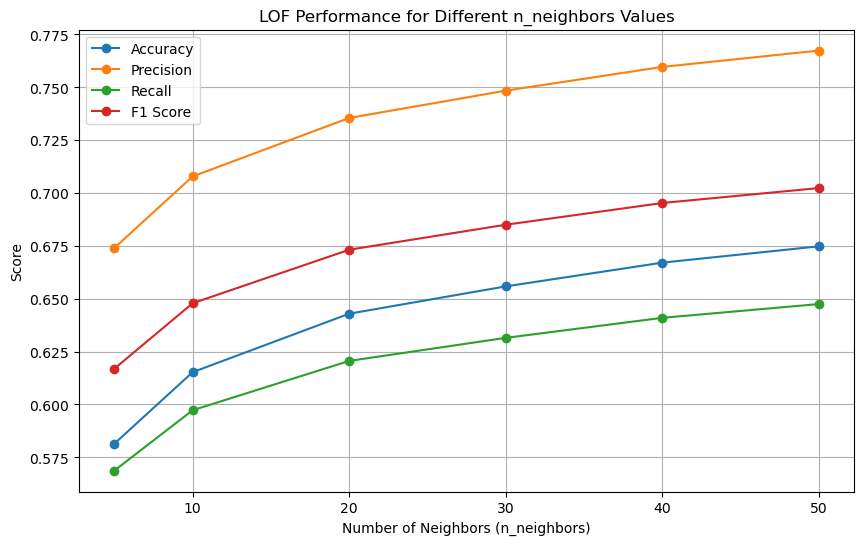

In [19]:
from sklearn.neighbors import LocalOutlierFactor

# Function to evaluate LOF model performance
def evaluate_lof_for_n_neighbors(data, X_scaled, n_neighbors_values):
    results = []
    
    for n_neighbors in n_neighbors_values:
        print(f"\nEvaluating for n_neighbors = {n_neighbors}")
        
        # Create the Local Outlier Factor model
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.5)  # Adjust contamination if needed
        
        # Predict anomalies (note: LOF uses -1 for outliers and 1 for inliers)
        data['anomaly'] = lof.fit_predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'n_neighbors': n_neighbors,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of n_neighbors values to try (this controls the number of neighbors for LOF)
n_neighbors_values = [5, 10, 20, 30, 40, 50]

# Call the function to evaluate the LOF model for different n_neighbors values
lof_results = evaluate_lof_for_n_neighbors(data, X_scaled, n_neighbors_values)

# Print the best n_neighbors and its corresponding accuracy
best_n_neighbors = max(lof_results, key=lambda x: x['accuracy'])
print(f"\nBest n_neighbors: {best_n_neighbors['n_neighbors']} with Accuracy: {best_n_neighbors['accuracy']:.4f}")
print(f"Precision: {best_n_neighbors['precision']:.4f}, Recall: {best_n_neighbors['recall']:.4f}, F1 Score: {best_n_neighbors['f1_score']:.4f}")

# Visualize the results
n_neighbors_list = [result['n_neighbors'] for result in lof_results]
accuracies = [result['accuracy'] for result in lof_results]
precisions = [result['precision'] for result in lof_results]
recalls = [result['recall'] for result in lof_results]
f1_scores = [result['f1_score'] for result in lof_results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score for LOF
plt.plot(n_neighbors_list, accuracies, label='Accuracy', marker='o')
plt.plot(n_neighbors_list, precisions, label='Precision', marker='o')
plt.plot(n_neighbors_list, recalls, label='Recall', marker='o')
plt.plot(n_neighbors_list, f1_scores, label='F1 Score', marker='o')

plt.title('LOF Performance for Different n_neighbors Values')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
